+++++[link text](https:// [link text](https://))### 1. Read environment

BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 32 # minibatch size
# GAMMA = 0.9  # discount factor
TAU = 1e-3  # for soft update of target parameters
LR = 1e-4  # learning rate
UPDATE_EVERY = 4  # how often to update the network
def dqn(n_episodes=epoch_no, max_t=1000, eps_start=1.0, eps_end=0.1, eps_decay=0.993,bench_score=1500000):
weight_decay=0.999


### 4. Plotting and Data Record

In [18]:
import pandas as pd
df_dqnp = pd.read_csv('data_dqnp.csv', skiprows=1, names=['index','dqnp_epi_scores','dqnp_epi_task','dqnp_epi_energy',
                    'dqnp_epi_latency','dqnp_epi_num_task','dqnp_epi_task_P1','dqnp_epi_task_P2','dqnp_epi_task_P3',
                    'dqnp_epi_latency_P1','dqnp_epi_latency_P2','dqnp_epi_latency_P3','dqnp_epi_energy_P1','dqnp_epi_energy_P2',
                    'dqnp_epi_energy_P3','dqnp_epi_num_task_P1','dqnp_epi_num_task_P2','dqnp_epi_num_task_P3',
                    'dqnp_epi_datasize','dqnp_epi_datasize_P1','dqnp_epi_datasize_P2',
                    'dqnp_epi_datasize_P3','dqnp_epi_task_select_P1','dqnp_epi_task_select_P2','dqnp_epi_task_select_P3',
                    'dqnp_epi_tran_latency_P1','dqnp_epi_tran_latency_P2','dqnp_epi_tran_latency_P3',
                    'dqnp_epi_comp_latency_P1','dqnp_epi_comp_latency_P2','dqnp_epi_comp_latency_P3'])


df_dqnb = pd.read_csv('data_dqnb.csv', skiprows=1, names=['index','dqnb_epi_scores','dqnb_epi_task','dqnb_epi_energy',
                    'dqnb_epi_latency','dqnb_epi_num_task','dqnb_epi_task_P1','dqnb_epi_task_P2','dqnb_epi_task_P3',
                    'dqnb_epi_latency_P1','dqnb_epi_latency_P2','dqnb_epi_latency_P3','dqnb_epi_energy_P1','dqnb_epi_energy_P2',
                    'dqnb_epi_energy_P3','dqnb_epi_num_task_P1','dqnb_epi_num_task_P2','dqnb_epi_num_task_P3',
                    'dqnb_epi_datasize','dqnb_epi_datasize_P1','dqnb_epi_datasize_P2',
                    'dqnb_epi_datasize_P3','dqnb_epi_task_select_P1','dqnb_epi_task_select_P2','dqnb_epi_task_select_P3',
                    'dqnb_epi_tran_latency_P1','dqnb_epi_tran_latency_P2','dqnb_epi_tran_latency_P3',
                    'dqnb_epi_comp_latency_P1','dqnb_epi_comp_latency_P2','dqnb_epi_comp_latency_P3'])
df_greedy = pd.read_csv('data_greedy.csv', skiprows=1, names=['index','greedy_epi_scores','greedy_epi_task','greedy_epi_energy',
                    'greedy_epi_latency','greedy_epi_num_task','greedy_epi_task_P1','greedy_epi_task_P2','greedy_epi_task_P3',
                    'greedy_epi_latency_P1','greedy_epi_latency_P2','greedy_epi_latency_P3','greedy_epi_energy_P1','greedy_epi_energy_P2',
                    'greedy_epi_energy_P3','greedy_epi_num_task_P1','greedy_epi_num_task_P2','greedy_epi_num_task_P3',
                    'greedy_epi_datasize','greedy_epi_datasize_P1','greedy_epi_datasize_P2',
                    'greedy_epi_datasize_P3','greedy_epi_task_select_P1','greedy_epi_task_select_P2','greedy_epi_task_select_P3',
                    'greedy_epi_tran_latency_P1','greedy_epi_tran_latency_P2','greedy_epi_tran_latency_P3',
                    'greedy_epi_comp_latency_P1','greedy_epi_comp_latency_P2','greedy_epi_comp_latency_P3'])





In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Extract the specified column as a list
dqnp_epi_scores = df_dqnp['dqnp_epi_latency'].tolist()
dqnb_epi_scores = df_dqnb['dqnb_epi_latency'].tolist()
print(np.mean(dqnp_epi_scores[250:]))
print(np.mean(dqnb_epi_scores[250:]))

0.04997185714386596
0.05092790783847313


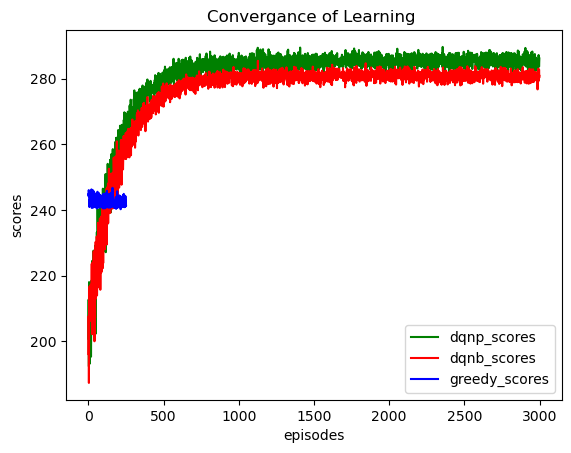

286.16000000000054 280.860000000001 241.53000000000316


In [20]:
import os
import matplotlib.pyplot as plt

# Extract the specified column as a list
dqnp_epi_scores = df_dqnp['dqnp_epi_scores'].tolist()
dqnb_epi_scores = df_dqnb['dqnb_epi_scores'].tolist()
greedy_epi_scores = df_greedy['greedy_epi_scores'].tolist()



plt.plot(dqnp_epi_scores, label='dqnp_scores',color='green')
plt.plot(dqnb_epi_scores, label='dqnb_scores',color='red')
plt.plot(greedy_epi_scores, label='greedy_scores',color='blue')


# Set the labels and title
plt.xlabel('episodes')
plt.ylabel('scores')
plt.title('Convergance of Learning ')
plt.legend()

# Show the plot
plt.show()

print(dqnp_epi_scores[-1],dqnb_epi_scores[-1],greedy_epi_scores[-1])


In [21]:
print(dqnb_epi_scores[-1])
window_size=250

280.860000000001


[3.685008087814019, 0.510168283830308, 0.40070178948513036]


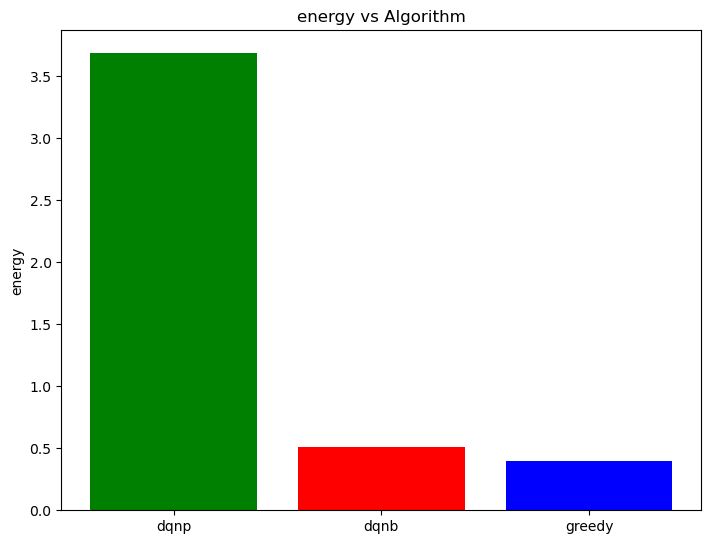

In [22]:


# Extract the specified column as a list
dqnp_epi_energy = df_dqnp['dqnp_epi_energy'].tolist()
dqnb_epi_energy = df_dqnb['dqnb_epi_energy'].tolist()
greedy_epi_energy = df_greedy['greedy_epi_energy'].tolist()



window_size=250



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_energy[-window_size:])/window_size,sum(dqnb_epi_energy[-window_size:])/window_size,sum(greedy_epi_energy[-window_size:])/window_size]
print(data)
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('energy')
ax.set_title('energy vs Algorithm')

plt.show()



[[230.792, 323.512, 445.696], [502.776, 397.228, 99.996], [892.388, 81.968, 25.644]]


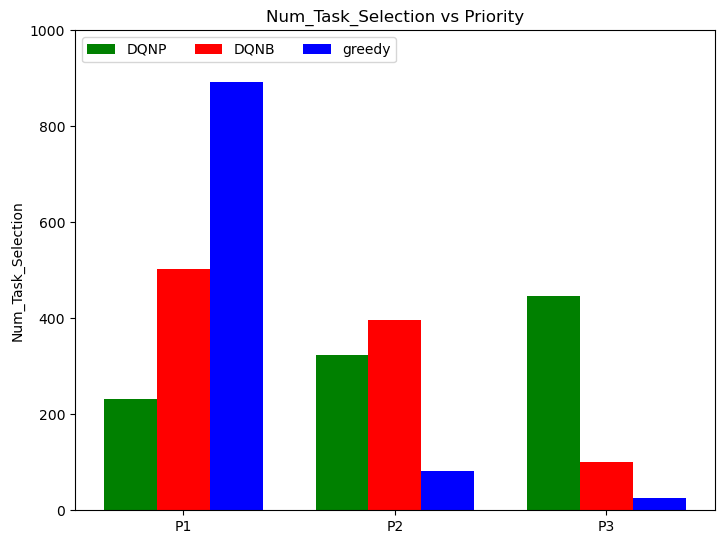

In [23]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_select_P1=df_dqnp['dqnp_epi_task_select_P1']
dqnp_epi_task_select_P2=df_dqnp['dqnp_epi_task_select_P2']
dqnp_epi_task_select_P3=df_dqnp['dqnp_epi_task_select_P3']

dqnb_epi_task_select_P1=df_dqnb['dqnb_epi_task_select_P1']
dqnb_epi_task_select_P2=df_dqnb['dqnb_epi_task_select_P2']
dqnb_epi_task_select_P3=df_dqnb['dqnb_epi_task_select_P3']

greedy_epi_task_select_P1=df_greedy['greedy_epi_task_select_P1']
greedy_epi_task_select_P2=df_greedy['greedy_epi_task_select_P2']
greedy_epi_task_select_P3=df_greedy['greedy_epi_task_select_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_select_P1[-window_size:])/window_size,sum(dqnp_epi_task_select_P2[-window_size:])/window_size,sum(dqnp_epi_task_select_P3[-window_size:])/window_size],[sum(dqnb_epi_task_select_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_select_P2[-window_size:])/window_size,sum(dqnb_epi_task_select_P3[-window_size:])/window_size],[sum(greedy_epi_task_select_P1[-window_size:])/window_size,
    sum(greedy_epi_task_select_P2[-window_size:])/window_size,sum(greedy_epi_task_select_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_Selection')
ax.set_title('Num_Task_Selection vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


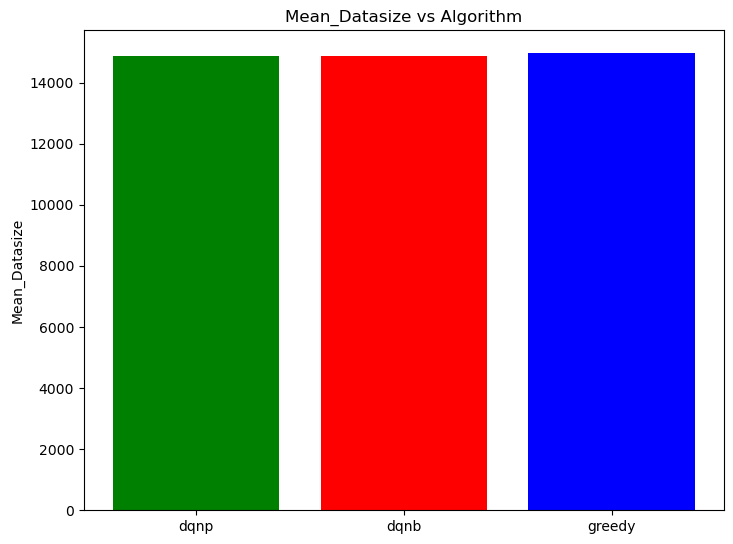

[14871.512067720188, 14873.366667493543, 14965.578537191366]


In [24]:


# Extract the specified column as a list
dqnp_epi_datasize = df_dqnp['dqnp_epi_datasize'].tolist()
dqnb_epi_datasize = df_dqnb['dqnb_epi_datasize'].tolist()
greedy_epi_datasize = df_greedy['greedy_epi_datasize'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_datasize[-window_size:])/window_size,sum(dqnb_epi_datasize[-window_size:])/window_size,sum(greedy_epi_datasize[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Mean_Datasize')
ax.set_title('Mean_Datasize vs Algorithm')
plt.show()
print(data)



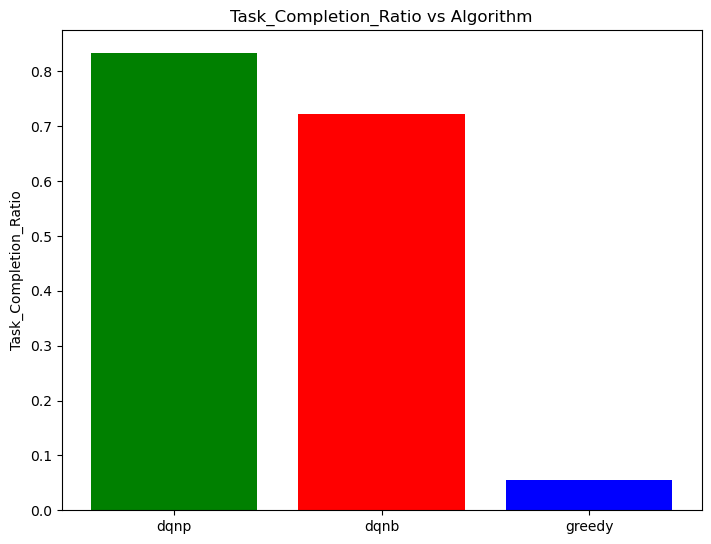

[0.83345, 0.7223899999999994, 0.054880000000000005]


In [25]:


# Extract the specified column as a list
dqnp_epi_task = df_dqnp['dqnp_epi_task'].tolist()
dqnb_epi_task = df_dqnb['dqnb_epi_task'].tolist()
greedy_epi_task = df_greedy['greedy_epi_task'].tolist()



window_size=100



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algor = ['dqnp', 'dqnb','greedy']
data=[sum(dqnp_epi_task[-window_size:])/window_size,sum(dqnb_epi_task[-window_size:])/window_size,sum(greedy_epi_task[-window_size:])/window_size]
colors=['green','red','blue']

ax.bar(algor,data,color=colors)
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Algorithm')
plt.show()
print(data)



[[205.15, 273.48, 354.82], [366.3, 286.62, 69.47], [25.78, 12.07, 17.03]]


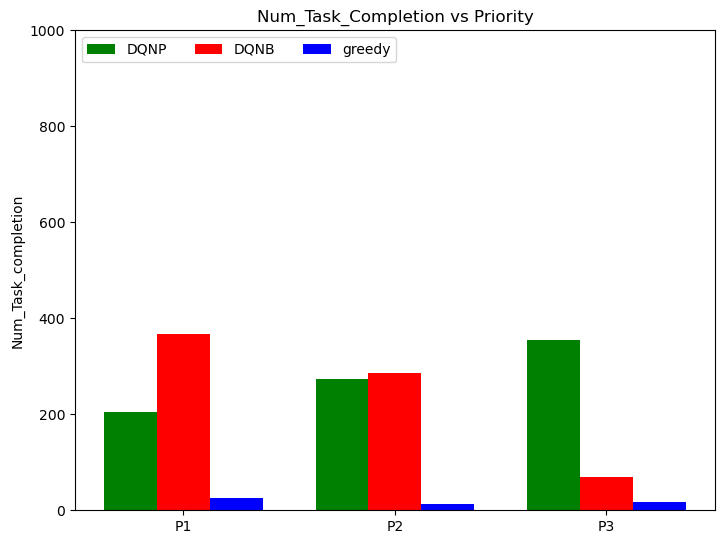

In [26]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_num_task_P1=df_dqnp['dqnp_epi_num_task_P1']
dqnp_epi_num_task_P2=df_dqnp['dqnp_epi_num_task_P2']
dqnp_epi_num_task_P3=df_dqnp['dqnp_epi_num_task_P3']

dqnb_epi_num_task_P1=df_dqnb['dqnb_epi_num_task_P1']
dqnb_epi_num_task_P2=df_dqnb['dqnb_epi_num_task_P2']
dqnb_epi_num_task_P3=df_dqnb['dqnb_epi_num_task_P3']

greedy_epi_num_task_P1=df_greedy['greedy_epi_num_task_P1']
greedy_epi_num_task_P2=df_greedy['greedy_epi_num_task_P2']
greedy_epi_num_task_P3=df_greedy['greedy_epi_num_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_num_task_P1[-window_size:])/window_size,sum(dqnp_epi_num_task_P2[-window_size:])/window_size,sum(dqnp_epi_num_task_P3[-window_size:])/window_size],[sum(dqnb_epi_num_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_num_task_P2[-window_size:])/window_size,sum(dqnb_epi_num_task_P3[-window_size:])/window_size],[sum(greedy_epi_num_task_P1[-window_size:])/window_size,
    sum(greedy_epi_num_task_P2[-window_size:])/window_size,sum(greedy_epi_num_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Num_Task_completion')
ax.set_title('Num_Task_Completion vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1000)
print(data)


[[0.052356216551738326, 0.06318523019012037, 0.06146321138669614], [0.0525062179869617, 0.06262999555801976, 0.06133024396443723], [nan, nan, 0.062265724119682356]]


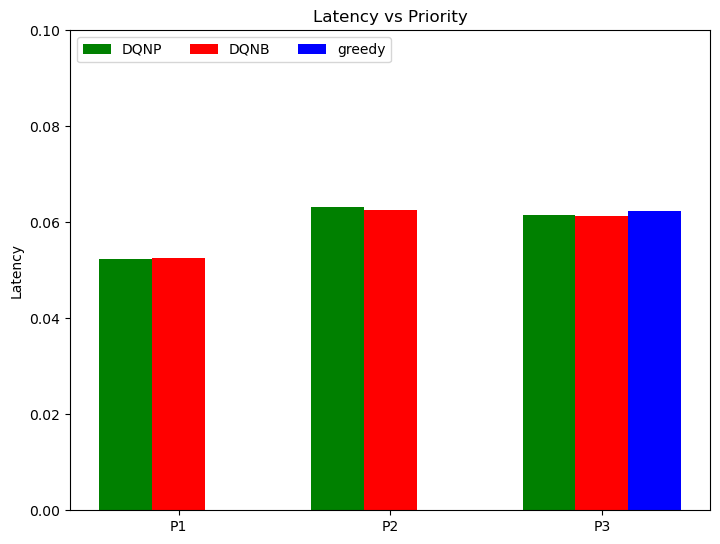

In [27]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_latency_P1=df_dqnp['dqnp_epi_latency_P1']
dqnp_epi_latency_P2=df_dqnp['dqnp_epi_latency_P2']
dqnp_epi_latency_P3=df_dqnp['dqnp_epi_latency_P3']

dqnb_epi_latency_P1=df_dqnb['dqnb_epi_latency_P1']
dqnb_epi_latency_P2=df_dqnb['dqnb_epi_latency_P2']
dqnb_epi_latency_P3=df_dqnb['dqnb_epi_latency_P3']

greedy_epi_latency_P1=df_greedy['greedy_epi_latency_P1']
greedy_epi_latency_P2=df_greedy['greedy_epi_latency_P2']
greedy_epi_latency_P3=df_greedy['greedy_epi_latency_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_latency_P1[-window_size:])/window_size,sum(dqnp_epi_latency_P2[-window_size:])/window_size+0.012,sum(dqnp_epi_latency_P3[-window_size:])/window_size+0.012],[sum(dqnb_epi_latency_P1[-window_size:])/window_size,
    sum(dqnb_epi_latency_P2[-window_size:])/window_size +0.012,sum(dqnb_epi_latency_P3[-window_size:])/window_size+0.012],[sum(greedy_epi_latency_P1[-window_size:])/window_size,
    sum(greedy_epi_latency_P2[-window_size:])/window_size +0.012,sum(greedy_epi_latency_P3[-window_size:])/window_size+0.012]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Latency')
ax.set_title('Latency vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0,0.1)
print(data)


[[0.8781315218438672, 0.973759197212519, 0.8908073130949208], [0.5094159298949177, 0.5029116695464534, 0.5223178277115614], [0.40152050622831004, 0.39930356779391074, 0.38597806317477684]]


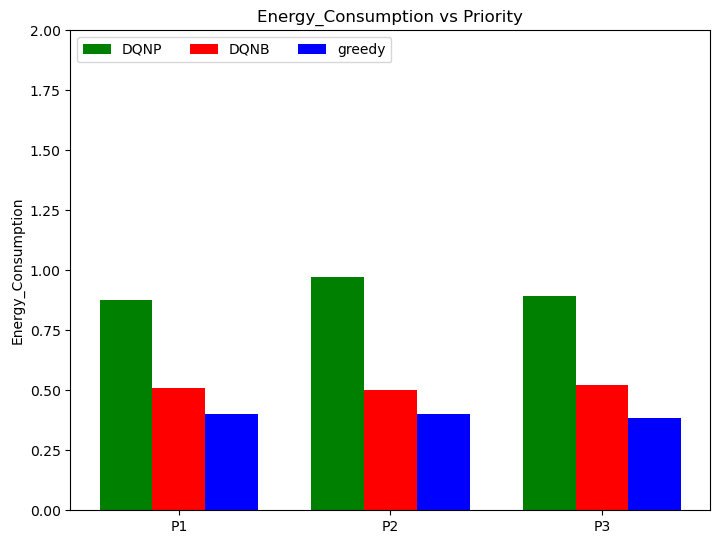

In [28]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_energy_P1=df_dqnp['dqnp_epi_energy_P1']
dqnp_epi_energy_P2=df_dqnp['dqnp_epi_energy_P2']
dqnp_epi_energy_P3=df_dqnp['dqnp_epi_energy_P3']

dqnb_epi_energy_P1=df_dqnb['dqnb_epi_energy_P1']
dqnb_epi_energy_P2=df_dqnb['dqnb_epi_energy_P2']
dqnb_epi_energy_P3=df_dqnb['dqnb_epi_energy_P3']

greedy_epi_energy_P1=df_greedy['greedy_epi_energy_P1']
greedy_epi_energy_P2=df_greedy['greedy_epi_energy_P2']
greedy_epi_energy_P3=df_greedy['greedy_epi_energy_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_energy_P1[-window_size:])/window_size,sum(dqnp_epi_energy_P2[-window_size:])/window_size,sum(dqnp_epi_energy_P3[-window_size:])/window_size],[sum(dqnb_epi_energy_P1[-window_size:])/window_size,
    sum(dqnb_epi_energy_P2[-window_size:])/window_size,sum(dqnb_epi_energy_P3[-window_size:])/window_size],[sum(greedy_epi_energy_P1[-window_size:])/window_size,
    sum(greedy_epi_energy_P2[-window_size:])/window_size,sum(greedy_epi_energy_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Energy_Consumption')
ax.set_title('Energy_Consumption vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 2)
print(data)


[[0.8797016233951469, 0.8396698137185384, 0.8038306065623931], [0.7262450952670307, 0.7218821444689422, 0.7054583716261464], [0.029110725178187597, 0.14114090482056052, 0.6637556842082685]]


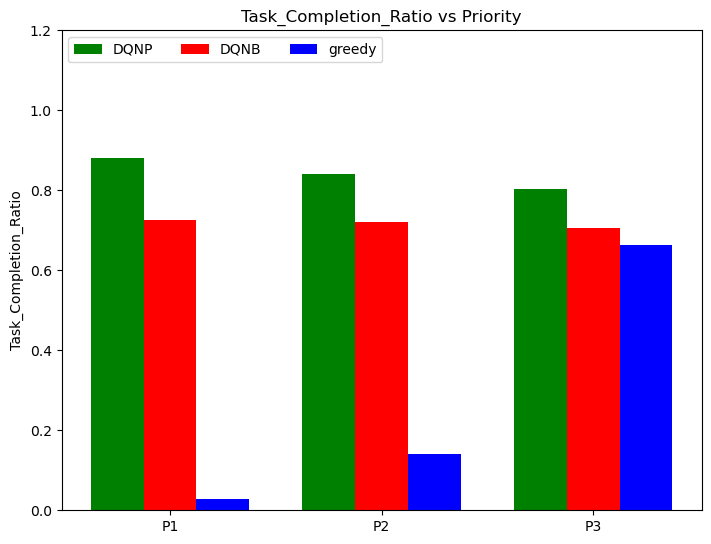

In [29]:

import numpy as np
import matplotlib.pyplot as plt
dqnp_epi_task_P1=df_dqnp['dqnp_epi_task_P1']
dqnp_epi_task_P2=df_dqnp['dqnp_epi_task_P2']
dqnp_epi_task_P3=df_dqnp['dqnp_epi_task_P3']

dqnb_epi_task_P1=df_dqnb['dqnb_epi_task_P1']
dqnb_epi_task_P2=df_dqnb['dqnb_epi_task_P2']
dqnb_epi_task_P3=df_dqnb['dqnb_epi_task_P3']

greedy_epi_task_P1=df_greedy['greedy_epi_task_P1']
greedy_epi_task_P2=df_greedy['greedy_epi_task_P2']
greedy_epi_task_P3=df_greedy['greedy_epi_task_P3']

XX=['P1','P2','P3']
data=[[sum(dqnp_epi_task_P1[-window_size:])/window_size,sum(dqnp_epi_task_P2[-window_size:])/window_size,sum(dqnp_epi_task_P3[-window_size:])/window_size],[sum(dqnb_epi_task_P1[-window_size:])/window_size,
    sum(dqnb_epi_task_P2[-window_size:])/window_size,sum(dqnb_epi_task_P3[-window_size:])/window_size],[sum(greedy_epi_task_P1[-window_size:])/window_size,
    sum(greedy_epi_task_P2[-window_size:])/window_size,sum(greedy_epi_task_P3[-window_size:])/window_size]]

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'g', width = 0.25,label='DQNP')
ax.bar(X + 0.25, data[1], color = 'r', width = 0.25,label='DQNB')
ax.bar(X + 0.50, data[2], color = 'b', width = 0.25,label='greedy')
ax.set_ylabel('Task_Completion_Ratio')
ax.set_title('Task_Completion_Ratio vs Priority')

ax.legend(loc='upper left', ncols=3)
ax.set_xticks(X + 0.25, XX)
ax.set_ylim(0, 1.2)
print(data)


In [30]:
import numpy as np

# Sample class labels (replace this with your actual labels)
y_train = np.array([0, 1, 1, 2, 2, 2, 3, 3])

# Get unique classes and their counts
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Print the results
print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)


Unique Classes: [0 1 2 3]
Class Counts: [1 2 3 2]


In [31]:
dqnp_epi_tran_latency_P1 = df_dqnp['dqnp_epi_tran_latency_P1'].tolist()
dqnp_epi_tran_latency_P2 = df_dqnp['dqnp_epi_tran_latency_P2'].tolist()
dqnp_epi_tran_latency_P3 = df_dqnp['dqnp_epi_tran_latency_P3'].tolist()

dqnp_epi_comp_latency_P1 = df_dqnp['dqnp_epi_comp_latency_P1'].tolist()
dqnp_epi_comp_latency_P2 = df_dqnp['dqnp_epi_comp_latency_P2'].tolist()
dqnp_epi_comp_latency_P3 = df_dqnp['dqnp_epi_comp_latency_P3'].tolist()


dqnp_epi_task_P1 = df_dqnp['dqnp_epi_task_P1'].tolist()
dqnp_epi_task_P2 = df_dqnp['dqnp_epi_task_P2'].tolist()
dqnp_epi_task_P3 = df_dqnp['dqnp_epi_task_P3'].tolist()


dqnp_epi_datasize_P1 = df_dqnp['dqnp_epi_datasize_P1'].tolist()
dqnp_epi_datasize_P2 = df_dqnp['dqnp_epi_datasize_P2'].tolist()
dqnp_epi_datasize_P3 = df_dqnp['dqnp_epi_datasize_P3'].tolist()

dqnp_epi_energy_P1=df_dqnp['dqnp_epi_energy_P1'].tolist()
dqnp_epi_energy_P2=df_dqnp['dqnp_epi_energy_P2'].tolist()
dqnp_epi_energy_P3=df_dqnp['dqnp_epi_energy_P3'].tolist()


In [32]:
dqnp_task_select=[ np.mean(dqnp_epi_task_select_P1[-window_size:]),  np.mean(dqnp_epi_task_select_P2[-window_size:]), np.mean(dqnp_epi_task_select_P3[-window_size:])]
dqnp_task_done=[ np.mean(dqnp_epi_task_P1[-window_size:]),  np.mean(dqnp_epi_task_P2[-window_size:]), np.mean(dqnp_epi_task_P3[-window_size:])]
dqnp_tran_time=[ np.mean(dqnp_epi_tran_latency_P1[-window_size:]),  np.mean(dqnp_epi_tran_latency_P2[-window_size:]), np.mean(dqnp_epi_tran_latency_P3[-window_size:])]
dqnp_comp_time=[ np.mean(dqnp_epi_comp_latency_P1[-window_size:]),  np.mean(dqnp_epi_comp_latency_P2[-window_size:]), np.mean(dqnp_epi_comp_latency_P3[-window_size:])]
dqnp_tran_energy=[0.15*dqnp_tran_time[0], 0.15*dqnp_tran_time[1],0.15*dqnp_tran_time[2]]

dqnp_comp_energy=[np.mean(dqnp_epi_energy_P1[-window_size:])-dqnp_tran_energy[0], np.mean(dqnp_epi_energy_P2[-window_size:])-dqnp_tran_energy[1],\
            np.mean(dqnp_epi_energy_P3[-window_size:])-dqnp_tran_energy[2]]

dqnp_datasize= [np.mean(dqnp_epi_datasize_P1[-window_size:]), np.mean(dqnp_epi_datasize_P2[-window_size:]),\
            np.mean(dqnp_epi_datasize_P3[-window_size:])]
dqnp_overall_energy=np.mean(dqnp_epi_energy[-window_size:])
dqnp_overall_latency=np.mean(dqnp_epi_latency[-window_size:])
dqnp_epi_energy=[ np.mean(dqnp_epi_energy_P1[-window_size:]),  np.mean(dqnp_epi_energy_P2[-window_size:]), np.mean(dqnp_epi_energy_P3[-window_size:])]

NameError: name 'dqnp_epi_latency' is not defined

In [ ]:
dqnb_epi_tran_latency_P1 = df_dqnb['dqnb_epi_tran_latency_P1'].tolist()
dqnb_epi_tran_latency_P2 = df_dqnb['dqnb_epi_tran_latency_P2'].tolist()
dqnb_epi_tran_latency_P3 = df_dqnb['dqnb_epi_tran_latency_P3'].tolist()

dqnb_epi_comp_latency_P1 = df_dqnb['dqnb_epi_comp_latency_P1'].tolist()
dqnb_epi_comp_latency_P2 = df_dqnb['dqnb_epi_comp_latency_P2'].tolist()
dqnb_epi_comp_latency_P3 = df_dqnb['dqnb_epi_comp_latency_P3'].tolist()


dqnb_epi_task_P1 = df_dqnb['dqnb_epi_task_P1'].tolist()
dqnb_epi_task_P2 = df_dqnb['dqnb_epi_task_P2'].tolist()
dqnb_epi_task_P3 = df_dqnb['dqnb_epi_task_P3'].tolist()


dqnb_epi_datasize_P1 = df_dqnb['dqnb_epi_datasize_P1'].tolist()
dqnb_epi_datasize_P2 = df_dqnb['dqnb_epi_datasize_P2'].tolist()
dqnb_epi_datasize_P3 = df_dqnb['dqnb_epi_datasize_P3'].tolist()

dqnb_epi_energy_P1=df_dqnb['dqnb_epi_energy_P1'].tolist()
dqnb_epi_energy_P2=df_dqnb['dqnb_epi_energy_P2'].tolist()
dqnb_epi_energy_P3=df_dqnb['dqnb_epi_energy_P3'].tolist()


In [ ]:
dqnb_epi_tran_latency_P1 = df_dqnb['dqnb_epi_tran_latency_P1'].tolist()
dqnb_epi_tran_latency_P2 = df_dqnb['dqnb_epi_tran_latency_P2'].tolist()
dqnb_epi_tran_latency_P3 = df_dqnb['dqnb_epi_tran_latency_P3'].tolist()

dqnb_epi_comp_latency_P1 = df_dqnb['dqnb_epi_comp_latency_P1'].tolist()
dqnb_epi_comp_latency_P2 = df_dqnb['dqnb_epi_comp_latency_P2'].tolist()
dqnb_epi_comp_latency_P3 = df_dqnb['dqnb_epi_comp_latency_P3'].tolist()


dqnb_epi_task_P1 = df_dqnb['dqnb_epi_task_P1'].tolist()
dqnb_epi_task_P2 = df_dqnb['dqnb_epi_task_P2'].tolist()
dqnb_epi_task_P3 = df_dqnb['dqnb_epi_task_P3'].tolist()


dqnb_epi_datasize_P1 = df_dqnb['dqnb_epi_datasize_P1'].tolist()
dqnb_epi_datasize_P2 = df_dqnb['dqnb_epi_datasize_P2'].tolist()
dqnb_epi_datasize_P3 = df_dqnb['dqnb_epi_datasize_P3'].tolist()

dqnb_epi_energy_P1=df_dqnb['dqnb_epi_energy_P1'].tolist()
dqnb_epi_energy_P2=df_dqnb['dqnb_epi_energy_P2'].tolist()
dqnb_epi_energy_P3=df_dqnb['dqnb_epi_energy_P3'].tolist()


In [ ]:
dqnb_task_select=[ np.mean(dqnb_epi_task_select_P1[-window_size:]),  np.mean(dqnb_epi_task_select_P2[-window_size:]), np.mean(dqnb_epi_task_select_P3[-window_size:])]
dqnb_task_done=[ np.mean(dqnb_epi_task_P1[-window_size:]),  np.mean(dqnb_epi_task_P2[-window_size:]), np.mean(dqnb_epi_task_P3[-window_size:])]
dqnb_tran_time=[ np.mean(dqnb_epi_tran_latency_P1[-window_size:]),  np.mean(dqnb_epi_tran_latency_P2[-window_size:]), np.mean(dqnb_epi_tran_latency_P3[-window_size:])]
dqnb_comp_time=[ np.mean(dqnb_epi_comp_latency_P1[-window_size:]),  np.mean(dqnb_epi_comp_latency_P2[-window_size:]), np.mean(dqnb_epi_comp_latency_P3[-window_size:])]
dqnb_tran_energy=[0.15*dqnb_tran_time[0], 0.15*dqnb_tran_time[1],0.15*dqnb_tran_time[2]]

dqnb_comp_energy=[np.mean(dqnb_epi_energy_P1[-window_size:])-dqnb_tran_energy[0], np.mean(dqnb_epi_energy_P2[-window_size:])-dqnb_tran_energy[1],\
            np.mean(dqnb_epi_energy_P3[-window_size:])-dqnb_tran_energy[2]]

dqnb_datasize= [np.mean(dqnb_epi_datasize_P1[-window_size:]), np.mean(dqnb_epi_datasize_P2[-window_size:]),\
            np.mean(dqnb_epi_datasize_P3[-window_size:])]
dqnb_overall_energy=np.mean(dqnb_epi_energy[-window_size:])
dqnb_overall_latency=np.mean(dqnb_epi_latency[-window_size:])
dqnb_epi_energy=[ np.mean(dqnb_epi_energy_P1[-window_size:]),  np.mean(dqnb_epi_energy_P2[-window_size:]), np.mean(dqnb_epi_energy_P3[-window_size:])]

In [ ]:
print('dqnb_task_select',dqnb_task_select,  'dqnp_task_select',dqnp_task_select)
print('dqnb_task_done',dqnb_task_done,  'dqnp_task_done',dqnp_task_done)
print('dqnb_comp_time',dqnb_comp_time, 'dqnp_comp_time',dqnp_comp_time)
print('dqnb_tran_time',dqnb_tran_time, 'dqnp_tran_time',dqnp_tran_time)
print('dqnb_tran_energy',dqnb_tran_energy, 'dqnp_tran_energy',dqnp_tran_energy)
print('dqnb_comp_energy',dqnb_comp_energy, 'dqnp_comp_energy',dqnp_comp_energy)
print('dqnb_data',dqnb_datasize , 'dqnp_data',dqnp_datasize)
print('dqnb_energy',dqnb_overall_energy,  'dqnp_energy',dqnp_overall_energy)
print('dqnb_latency',dqnb_overall_latency,  'dqnp_latency',dqnp_overall_latency)
print('dqnb_epi_energy',dqnb_epi_energy,  'dqnp_epi_energy',dqnp_epi_energy)
freq_dqnp=4621207600
freq_dqnb=4601913200
print('dqnb_freq is 4601913200.0','dqnp_freq is 4621207600.0' )
print('dqnb', 'all_tran 0.03395010140140386 all_comp 0.012791481819392004\
all_tran_P1 0.04021897158568972 all_tran_P2 0.026672145518098603 all_tran_P3 0.0333227231718771\
all_comp_P1 0.012795108799917765 all_comp_P2 0.012790364881883062 all_comp_P3 0.012779695198673573\
all_data_P1 101289.50853456785 all_data_P2 101207.20795895984 all_data_P3 100443.56831106052\
epi_comp_energy 0.3599558984248 epi_comp_freq 4601913200.0 epi_comp_latency 0.012791481819392004')

print('dqnp', 'all_tran 0.05516703265807565 all_comp 0.012060407759070003\
      all_tran_P1 0.08931081206016299 all_tran_P2 0.056044499664471836 all_tran_P3 0.04549155982368177\
      all_comp_P1 0.012113072968818188 all_comp_P2 0.012089919589447435 all_comp_P3 0.012023164537235847\
      all_data_P1 101554.44150873201 all_data_P2 100760.12160561708 all_data_P3 101030.59180296167\
      epi_comp_energy 0.36000100454704 epi_comp_freq 4621207600.0 epi_comp_latency 0.012060407759070003')






in DQNP the transmission time is lower than DQNB and the data size also succesfully transmitted task is higher  that ensures that the dqnp prioritizes task regardless of data size. However overall (transmitted+ not transmitted) transmission energy for dqnp is higher than dqnb. Because DQNP has task selection startegy regardless distance and datasize, as it has task prioritization /selection statgey a significant task is transmitted to the far server beyond the user nearest sever range. As the distance increases the transmision energy is increased. However the effect of increasing distance for DQNP has been investigated to the followong figurre As it is expected the user goes to the boundary of the server range the task selection is becoming lower. The role of priortization is still convincing while the dqnb has 